Load the data file Wage.rds or Wage.csv:

In [ ]:
import pandas as pd
Wage = pd.read_csv("dataset/Wage.csv")

Display the number of features and their names:

In [20]:
print(Wage.shape[1])
print(Wage.columns.tolist())

11
['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'wage']


Delete the feature ‘logwage’ and display the number of features and their names again:

In [4]:
Wage = Wage.drop(columns=["logwage"])
print(Wage.shape[1])
print(Wage.columns.tolist())

11
['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'wage']


Display the number of data points:

In [5]:
print(Wage.shape[0])

3000


Display the data in a table (subset of rows is sufficient):

In [6]:
Wage.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154


Print a statistic summary of the features (year, age, maritl, race, education, region, jobclass, health,
health_ins) and the label (wage):

In [7]:
Wage.describe(include="all")

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
count,3000.000000,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000.000000
unique,NaN,NaN,NaN,5,4,5,1,2,2,2,NaN
top,NaN,NaN,NaN,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN
freq,NaN,NaN,NaN,2074,2480,971,3000,1544,2142,2083,NaN
mean,218883.373000,2005.791000,42.414667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.703608
std,145654.072587,2.026167,11.542406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.728595
min,7373.000000,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.085537
25%,85622.250000,2004.000000,33.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.383940
50%,228799.500000,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.921507
75%,374759.500000,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.680488


For the numerical features, check the correlation, i.e., the relation of feature to lable variations.
Therefore, for each such feature perform the following steps:
1. Plot the feature against the lable values
2. Test the normality of the feature and lable values
3. Test their correlation using an appropriate test
4. Interprete the results

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Step 1: Plot the feature against the lable values:

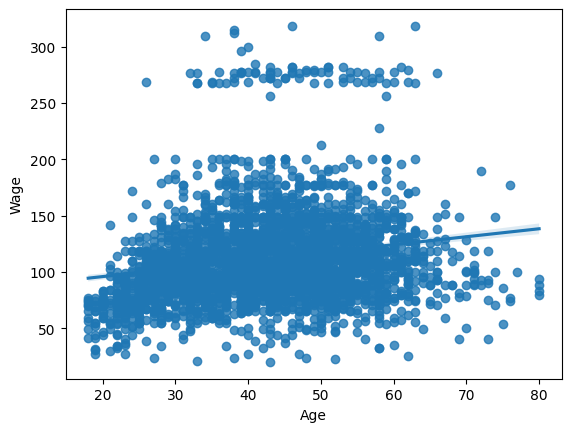

In [10]:
sns.regplot(x="age", y="wage", data=Wage)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

Step 2: Test the normality of the feature and lable values:

Shapiro test for age: ShapiroResult(statistic=0.9910561787924322, pvalue=9.416337654404108e-13)


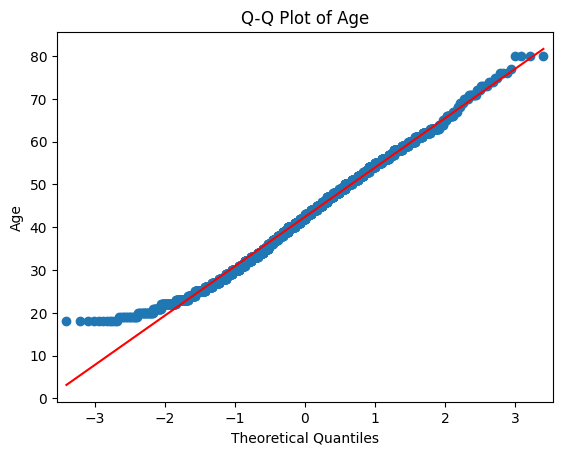

Shapiro test for wage: ShapiroResult(statistic=0.8795743517164918, pvalue=2.463070103676827e-43)


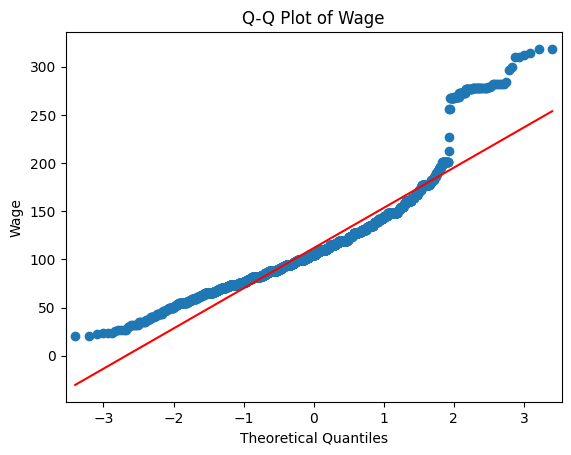

In [15]:
from scipy.stats import shapiro
import statsmodels.api as sm

print("Shapiro test for age:", shapiro(Wage["age"]))
sm.qqplot(Wage["age"], line="s")
plt.title("Q-Q Plot of Age")
plt.ylabel("Age")
plt.show()
print("Shapiro test for wage:", shapiro(Wage["wage"]))
sm.qqplot(Wage["wage"], line="s")
plt.title("Q-Q Plot of Wage")
plt.ylabel("Wage")
plt.show()

Step 3: Perform the Pearson correlation test:

In [21]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(Wage["age"], Wage["wage"])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.1956372015635886
P-value: 2.900777675211075e-27


step 4 1/2 :
Wage vs. Age
Step 1: From the slope of the regression line, we see that on average wages tend to increase as age increases. However, the cloud of scattered points shows that age alone is a poor predictor of wage—many other factors clearly play a role. You’ll also notice that middle-aged workers cluster at higher wages more than the very youngest or oldest workers, suggesting the upward trend holds mainly within a certain age range.

Step 2: Because the Pearson correlation test assumes normality, we performed Shapiro–Wilk tests. Both age and wage returned p ≪ 0.05, so we reject normality for each.

Age Q–Q plot: the central points lie close to the line but the lower tail deviates (few very young earners, as expected).

Wage Q–Q plot: both the upper and lower tails stray from the line, indicating heavy-tailed departures from normality.

Step 3: The Pearson correlation coefficient is r ≈ 0.196, confirming a weak positive relationship between age and wage. The very small p-value (<10⁻²⁵) means this correlation is statistically significant, though it explains only about 4% of the variance in wages.



now the exact same code but for the other numerical feature year :

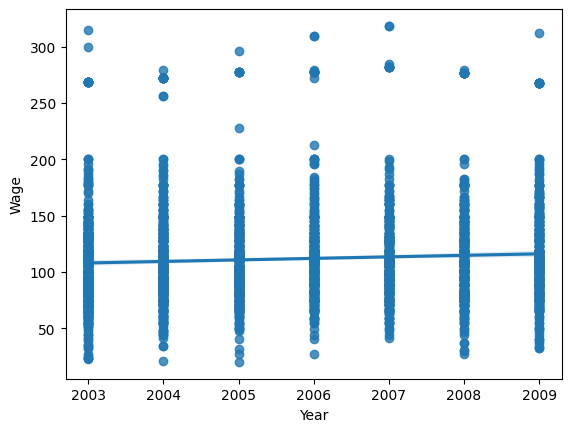

Shapiro test for year: ShapiroResult(statistic=0.9111278152133864, pvalue=9.247291644463872e-39)


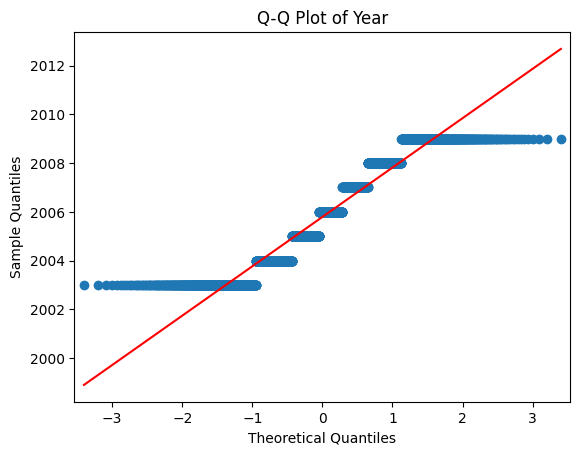

Year–Wage correlation: 0.06554427797296272 p-value: 0.00032767779260474455


In [22]:
# Step 1: plot
sns.regplot(x="year", y="wage", data=Wage)
plt.xlabel("Year")
plt.ylabel("Wage")
plt.show()

# Step 2: normality
print("Shapiro test for year:", shapiro(Wage["year"]))
sm.qqplot(Wage["year"], line="s")
plt.title("Q-Q Plot of Year")
plt.show()

# Step 3: correlation
corr, p_value = pearsonr(Wage["year"], Wage["wage"])
print("Year–Wage correlation:", corr, "p-value:", p_value)

step 4 2/2:
wage vs year :

step 1 : from the slope of the regression line we see that wages have crept up slightly between 2003 and 2009, but the cloud of points is very wide at each year. that tells us year alone is a poor predictor of wage and most of the variation comes from other factors.

step 2 : Shapiro–Wilk for year: W = 0.911, p ≈ 9.2 × 10⁻³⁹ → year is not normally distributed (it only takes seven discrete values). the Q–Q plot shows clear “steps” at each calendar year. wage again fails normality (heavy tails on both ends) as before.

step 3 : Pearson’s r ≈ 0.0655, p ≈ 3.3 × 10⁻⁴ → a very weak but statistically significant positive correlation. year explains under 1% of wage variance, so although wages have inched upward over time, the effect is negligible in practice.


For the non-numerical features, analyse the variance (ANOVA), to study differences between
the means of the label values for groups of data points with the same feature value. Therefore, for
each such feature perform the following steps:
1. List the possible feature values
2. Plot (box plot) the label values for each group of of data points with the same feature value.
3. Perform the one way ANOVA test
4. Interprete the results


Step 1: List the possible feature values:


In [17]:
print(Wage["education"].unique())

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


Step 2: Plot (box plot) the label values for each group of of data points with the same feature
value:

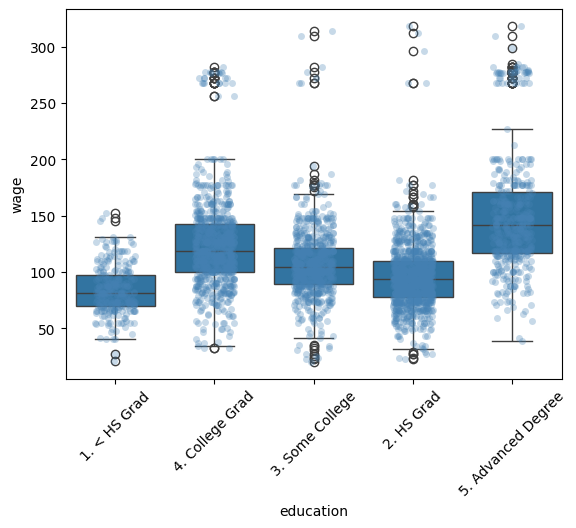

In [18]:
sns.boxplot(x="education", y="wage", data=Wage)
sns.stripplot(x="education", y="wage", data=Wage, color="steelblue", alpha=0.3, jitter=0.2)
plt.xticks(rotation=45)
plt.show()

Step 3. Perform the one-way ANOVA test:

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("wage ~ C(education)", data=Wage).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq      df           F         PR(>F)
C(education)  1.226364e+06     4.0  229.805921  2.915932e-172
Residual      3.995721e+06  2995.0         NaN            NaN


Wage vs. Education
(Skipping Step 1 since it’s just listing the categories.)

Step 2: From the boxplots (with overlaid points), we see that the medians, IQRs, and whiskers clearly shift upward as education level increases. This indicates that wages tend to rise with more education. Although there are outliers in each group, the overall trend is strongly upward.

Step 3: The one-way ANOVA yields a very large F-statistic (~229.8), meaning that between-group variance (differences among education-level means) is far greater than within-group variance (individual scatter). The p-value is essentially zero, so we reject the null that all five group means are equal.

Interpretation: There are highly significant differences in mean wage across education levels—higher education is associated with higher average wages. However, there is also substantial within-group scatter, so education alone is not a precise predictor of an individual’s wage.


=== Feature: maritl ===
Values: ['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']


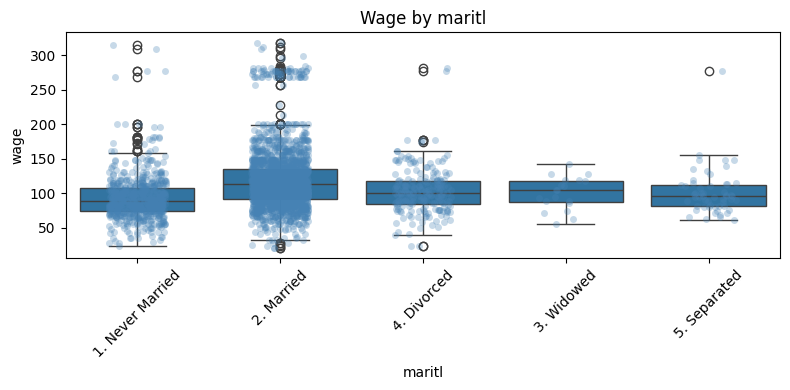

                 sum_sq      df          F        PR(>F)
C(maritl)  3.631444e+05     4.0  55.959585  1.401201e-45
Residual   4.858941e+06  2995.0        NaN           NaN

=== Feature: race ===
Values: ['1. White' '3. Asian' '4. Other' '2. Black']


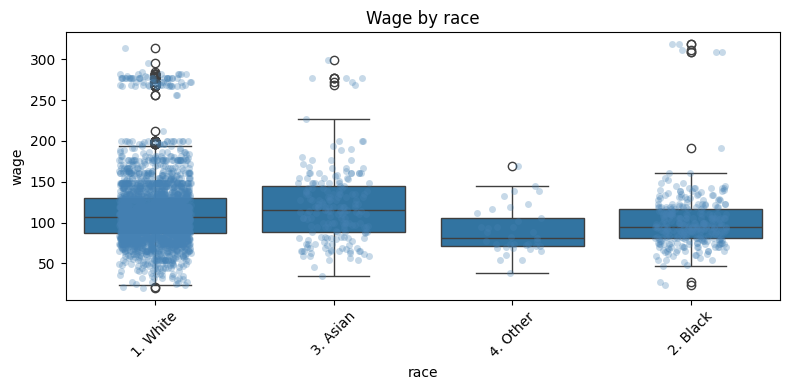

                sum_sq      df          F        PR(>F)
C(race)   6.321174e+04     3.0  12.236674  5.890230e-08
Residual  5.158874e+06  2996.0        NaN           NaN

=== Feature: jobclass ===
Values: ['1. Industrial' '2. Information']


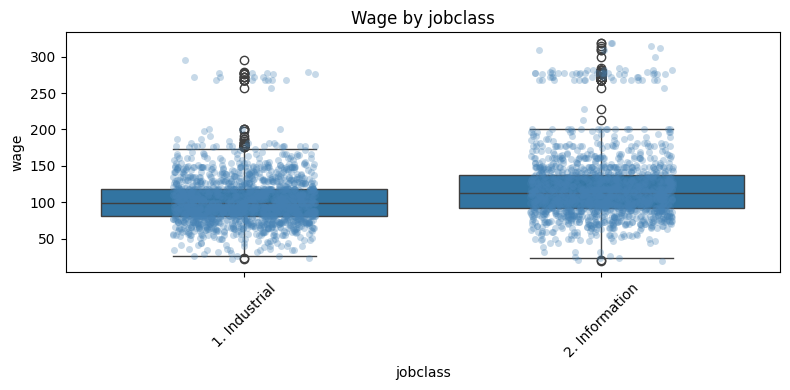

                   sum_sq      df           F        PR(>F)
C(jobclass)  2.235384e+05     1.0  134.072585  2.308186e-30
Residual     4.998547e+06  2998.0         NaN           NaN

=== Feature: health ===
Values: ['1. <=Good' '2. >=Very Good']


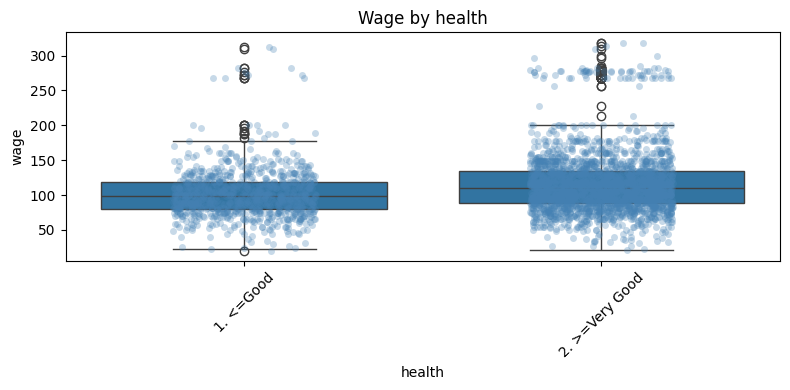

                 sum_sq      df          F        PR(>F)
C(health)  1.211874e+05     1.0  71.226641  4.886404e-17
Residual   5.100898e+06  2998.0        NaN           NaN

=== Feature: health_ins ===
Values: ['2. No' '1. Yes']


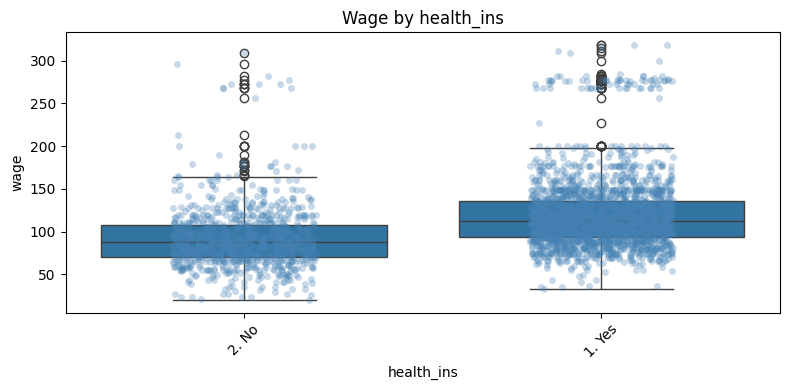

                     sum_sq      df           F        PR(>F)
C(health_ins)  4.963846e+05     1.0  314.907964  4.465783e-67
Residual       4.725701e+06  2998.0         NaN           NaN


In [24]:
# List of all non-numerical features except 'education'
categorical_feats = [
    "maritl",     # marital status
    "race",
    "jobclass",
    "health",
    "health_ins"  # health insurance
]

for feat in categorical_feats:
    print(f"\n=== Feature: {feat} ===")
    
    # Step 1: List possible values
    print("Values:", Wage[feat].unique())
    
    # Step 2: Box + strip plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=feat, y="wage", data=Wage)
    sns.stripplot(x=feat, y="wage", data=Wage,
                  color="steelblue", alpha=0.3, jitter=0.2)
    plt.title(f"Wage by {feat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Step 3: One-way ANOVA
    model       = ols(f"wage ~ C({feat})", data=Wage).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

### Wage vs. Marital Status
**Step 2:**  
The boxplots (with overlaid points) show that median wages are highest for Married individuals, followed by Divorced, Widowed, Separated, and lowest for Never Married. There’s substantial overlap and outliers in each group, but the overall pattern is clear: marital status is associated with differences in average wage.

**Step 3:**  
One-way ANOVA gives **F ≈ 55.96**, **p ≈ 1.4 × 10⁻⁴⁵**. The between-group variance in wages (across the five marital categories) is far larger than the within-group scatter, and we reject the null that all five means are equal.

**Interpretation:**  
Marital status has a statistically significant effect on wage. Married workers earn more on average than those never married or in other categories—but the within-group variability is still large, so marital status alone is an imperfect predictor.

---

### Wage vs. Race
**Step 2:**  
The boxplots reveal that Asian workers have the highest median wage, followed by White, Black, and Other. There’s considerable overlap, especially between White and Black, and a few high-wage outliers in every group.

**Step 3:**  
ANOVA yields **F ≈ 12.24**, **p ≈ 5.9 × 10⁻⁸**. The differences in mean wage across the four race categories are highly significant.

**Interpretation:**  
Race explains a significant but modest portion of wage variation—Asians tend to earn more on average, but overlap between groups means race is not a strong standalone predictor for individual wages.

---

### Wage vs. Job Class
**Step 2:**  
The two boxplots show that Information workers have a noticeably higher median wage and wider IQR than Industrial workers, though both groups contain high-wage outliers.

**Step 3:**  
ANOVA gives **F ≈ 134.07**, **p ≈ 2.3 × 10⁻³⁰**. The between-group variance (Information vs. Industrial) overwhelmingly exceeds within-group scatter.

**Interpretation:**  
Job class is a very strong predictor of wage: Information-sector employees earn substantially more on average than Industrial-sector employees, with highly significant differences.

---

### Wage vs. Health
**Step 2:**  
Comparing Good (≤Good) vs. Very Good (≥Very Good) health, the boxplot for Very Good health is shifted upward in median and IQR, with some extreme high-wage outliers, whereas Good health shows lower medians and a tighter spread.

**Step 3:**  
ANOVA yields **F ≈ 71.23**, **p ≈ 4.9 × 10⁻¹⁷**. The wage differences between the two health‐status groups are highly significant.

**Interpretation:**  
Self‐reported health status relates to wage: those reporting Very Good health earn more on average. Still, there’s enough overlap that health alone doesn’t fully explain individual wage variation.

---

### Wage vs. Health Insurance
**Step 2:**  
The boxplots indicate that workers with health insurance have a higher median wage and a broader IQR than those without insurance, with both groups showing high-wage outliers.

**Step 3:**  
ANOVA gives **F ≈ 314.91**, **p ≈ 4.5 × 10⁻⁶⁷**. This is the largest F among the categorical features, showing extremely significant mean differences.

**Interpretation:**  
Having health insurance is strongly associated with higher wages—more so than any other categorical feature here. Nonetheless, within-group scatter means insurance status isn’t a perfect predictor by itself. 